<a href="https://colab.research.google.com/github/aminoplis/HealthReports/blob/master/Covid_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Visualizing COVID-19 Data Beautifully in Python**
###Making Matplotlib a Little Less Painful!

Nik Piepenbreier (Apr 5)


Matplotlib may be the de facto data visualization library for Python, but it’s not always the prettiest. In this post, we’ll explore how to turn a drab, default Matplotlib graph into a beautiful data visualization. We’ll explore COVID-19 data to see how the virus has spread throughout different countries.

###Let’s Load in Our Data
We’ll be using data from this wonderful Github repository that auto-updates the data daily. We’ll load our data into a Pandas’ dataframe based on the URL so that it’ll update automatically for us every day.

In [0]:
#@title
# Section 1 - Loading our Libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
%matplotlib inline 

# Section 2 - Loading and Selecting Data
df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv', 
                 parse_dates=['Date'])
countries = ['Germany', 'Argentina', 'Italy', 'Spain', 'US', 'Chile', 'China', 'United Kingdom']
df = df[df['Country'].isin(countries)]

# Section 3 - Creating a Summary Column and Mortality Rate
df['Cases'] = df[['Confirmed', 'Recovered', 'Deaths']].sum(axis=1)
df['Mortality'] = df['Deaths']/df['Confirmed']*100
df.describe()

,Confirmed,Recovered,Deaths,Cases,Mortality
count,688.000000,688.000000,688.000000,688.000000,573.000000
mean,34949.005814,9330.000000,1964.084302,46243.090116,2.889463
std,79135.721632,20680.202334,4632.249139,95715.121509,3.473258
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,4.000000,0.000000
50%,470.500000,16.000000,5.000000,492.000000,2.007084
75%,45324.500000,2575.000000,1463.250000,51620.500000,4.023220
max,667801.000000,78401.000000,32916.000000,755420.000000,13.211388


* In **Section 1** of the Gist above, we’re loading our libraries. We’ll be making use of Pandas and Matplotlib for this tutorial.
* In **Section 2**, we read in the data into a dataframe df, and then select only the countries in our list countries. Selecting the data makes the resulting visualization a little more readable. https://github.com/datasets/covid-19/tree/master/data
* In **Section 3**, we create a summary column that aggregates the total number of cases across our confirmed cases, recovered cases, and any individuals who have died as a result of COVID-19.


###Preparing our Dataframes for Data Visualization
Now that we have our data stored within a dataframe, let’s prepare two further dataframes that will hold our data in crosstabs, which will allow us to more easily visualize the data.

In [0]:
#@title
# Section 4 - Restructuring our Data
dfp = df.pivot(index='Date', columns='Country', values='Cases')
countries = list(dfp.columns)
covid = dfp.reset_index('Date')
covid.set_index(['Date'], inplace=True)
covid.columns = countries
fechaactual=covid[len(covid)-1:].index[0].strftime("%Y-%m-%d")

dfm = df.pivot(index='Date', columns='Country', values='Mortality')
covidm = dfm.reset_index('Date')
covidm.set_index(['Date'], inplace=True)
covidm.columns = countries
#for country in list(covidm.columns):
#    covidm[country] = covidm[country]/covid[country]*100

# Section 5 - Calculating Rates per 100,000
populations = {'Argentina':45195774, 'Germany': 83783942, 'Italy': 60461826, 'Spain': 46754778, 
               'US': 331002651, 'Chile': 19116201, 'China':1439323776, 'United Kingdom': 67886011}
percapita = covid.copy()
for country in list(percapita.columns):
    percapita[country] = percapita[country]/populations[country]*100000
    
#covidm.head(-1)
covidm[len(covid)-5:].head()

,Argentina,Chile,China,Germany,Italy,Spain,US,United Kingdom
Date,,,,,,,,
2020-04-12,4.201681,1.109109,4.021219,2.363634,12.726156,10.315229,3.965151,12.474474
2020-04-13,4.393116,1.089701,4.019805,2.455563,12.829434,10.438627,4.052227,12.668304
2020-04-14,4.479578,1.162056,4.015317,2.507632,12.965265,10.464759,4.250827,12.788233
2020-04-15,4.543594,1.136226,4.014108,2.822943,13.105870,10.531175,4.451167,12.961008
2020-04-16,4.472968,1.192233,4.011846,2.942672,13.122925,10.443476,4.929013,13.211388


Let’s explore what we did here in a bit of detail:
* In **Section 4**, we pivot our dataframe df, creating columns out of countries, with the number of cases as the data fields. This new dataframe is called covid. We then set the index of the dataframe to be the date and assign the country names to column headers.
* In **Section 5**, we copy our dataframe covid and call it percapita. We use a dictionary that is storing all our countries’ populations and divide each value by the population and multiply it by 100,000 to generate a number of cases per 100,000 people. https://www.worldometers.info/world-population/population-by-country/

### Creating our First Visualization — Cases over Time
Let’s begin by creating our first visualization that will demonstrate the number of total cases over time in various countries:

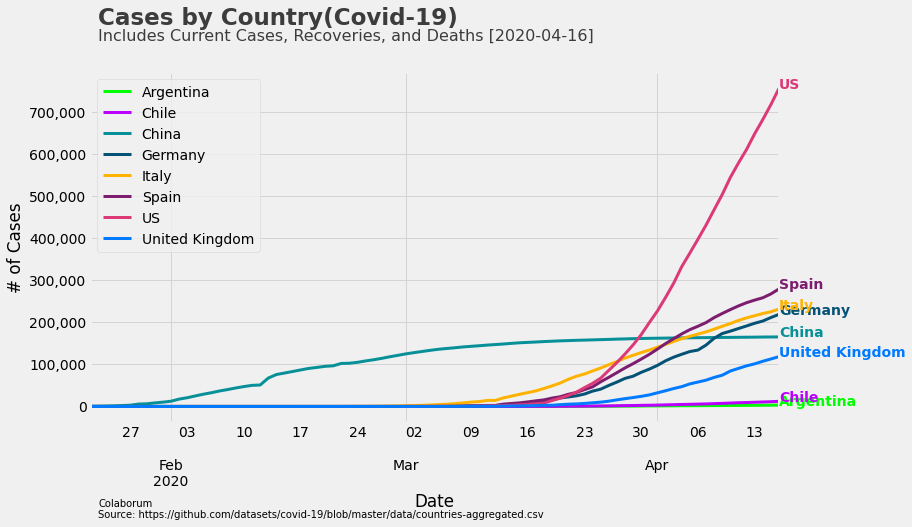

In [0]:
#@title
# Section 6 - Generating Colours and Style
colors = { 'Argentina':'#00FF00','Chile':'#BB00FF', 'China':'#089099', 'Germany':'#045275',
          'Italy':'#FFB200', 'Spain':'#7C1D6F', 'US':'#DC3977', 'United Kingdom':'#007aff' }
plt.style.use('fivethirtyeight')

# Section 7 - Creating the Visualization
plot = covid.plot(figsize=(11,6), color=list(colors.values()), linewidth=3, legend=True)
plot.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plot.grid(color='#d4d4d4')
plot.set_xlabel('Date')
plot.set_ylabel('# of Cases')

# Section 8 - Assigning Colour
for country in list(colors.keys()):
    plot.text(x = covid.index[-1], y = covid[country].max(), color = colors[country], s = country, 
              weight = 'bold')

# Section 9 - Adding Labels
plot.text(x = covid.index[1], y = int(covid.max().max())*1.2, 
          s = "Cases by Country(Covid-19)", fontsize = 23, weight = 'bold', alpha = .75)
plot.text(x = covid.index[1], y = int(covid.max().max())*1.15, 
          s = "Includes Current Cases, Recoveries, and Deaths ["+fechaactual+"]", fontsize = 16, alpha = .75)
plot.text(x = percapita.index[1], y = -int(covid.max().max())*.35,
          s = 'Colaborum\nSource: https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv', 
          fontsize = 10)
print('')

Let’s explore what we did her in a bit more detail:
* In **Section 6**, we created a dictionary that contains hex values for different countries. Storing this in a dictionary will allow us to easily call it later in a for-loop. We also assign the FiveThirtyEight style to add some general formatting, which we’ll heavily build upon.
* In **Section 7**, we create our first visualization using Pandas’ plot function. We use the colors parameter to assign the colors to different columns. We also use the set_major_formatter method to format values with separators for thousands.
* Then, in **Section 8**, we create a for-loop that generates label text for the various countries. This for-loop gets each country’s name from the keys in the dictionary in the form of a list and iterates over this list. It places text containing the country’s name to the right of the last x-value (covid.index[-1] → the last date in the dataframe), at the current day’s y-value (which will always be equal to the max value of that column).
* Finally, in **Section 9**, we add a title, subtitle, and source information about the chart. We use variables again to position the data so as the graph updates these positions are updated dynamically!

### Creating our Second Visualization — Cases per 100,000 People
To create our second visualization, we’ll make use of the code below:


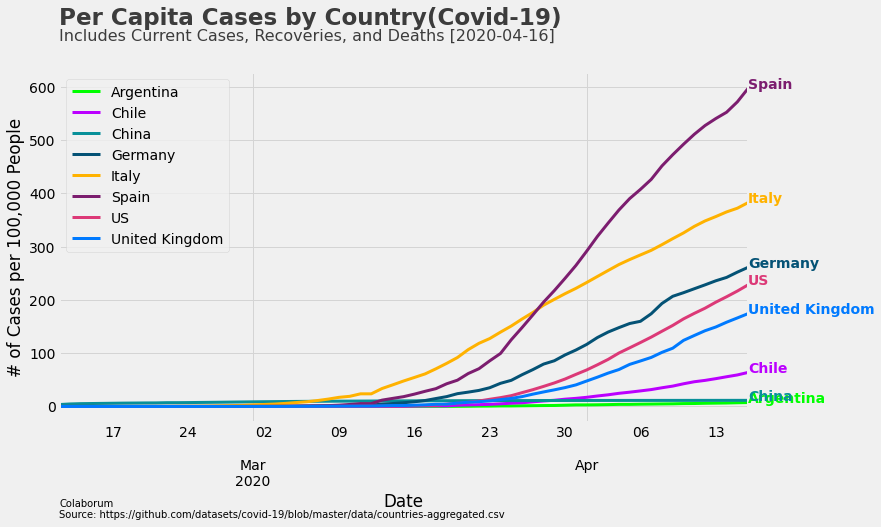

In [0]:
#@title
initdata=21
percapitaplot = percapita[+initdata:].plot(figsize=(11,6), color=list(colors.values()), linewidth=3, legend=True)
percapitaplot.grid(color='#d4d4d4')
percapitaplot.set_xlabel('Date')
percapitaplot.set_ylabel('# of Cases per 100,000 People')
for country in list(colors.keys()):
    percapitaplot.text(x = percapita.index[-1], y = percapita[country].max(), color = colors[country], 
                       s = country, weight = 'bold')
percapitaplot.text(x = percapita.index[+initdata], y = percapita.max().max()*1.2, 
                   s = "Per Capita Cases by Country(Covid-19)", fontsize = 23, weight = 'bold', alpha = .75)
percapitaplot.text(x = percapita.index[+initdata], y = percapita.max().max()*1.15, 
                   s = "Includes Current Cases, Recoveries, and Deaths ["+fechaactual+"]", fontsize = 16, alpha = .75)
percapitaplot.text(x = percapita.index[+initdata], y = -percapita.max().max()*0.35,
        s = 'Colaborum\nSource: https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv', 
        fontsize = 10)
print('')

### Creating our Tirth Visualization — Mortality
To create our Tirth visualization, we’ll make use of the code below:

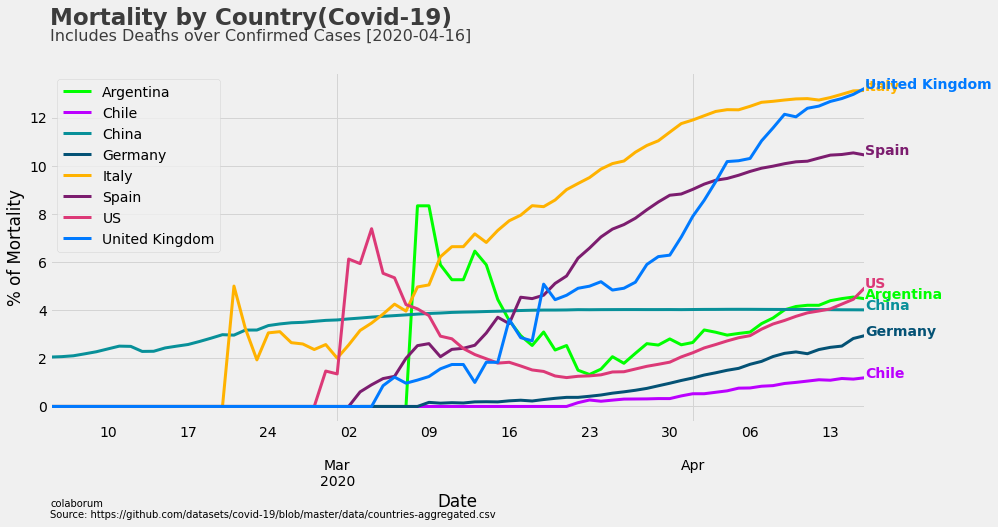

In [0]:
#@title
indexdata=14
covidmplot = covidm[+indexdata:].plot(figsize=(13,6), color=list(colors.values()), linewidth=3, legend=True)
covidmplot.grid(color='#d4d4d4')
covidmplot.set_xlabel('Date')
covidmplot.set_ylabel('% of Mortality')
for country in list(colors.keys()):
    covidmplot.text(x = covidm.index[-1], y = covidm[country][len(covidm)-1], color = colors[country], 
                       s = country, weight = 'bold')
covidmplot.text(x = covidm.index[+indexdata], y = covidm.max().max()*1.2, 
                   s = "Mortality by Country(Covid-19)", fontsize = 23, weight = 'bold', alpha = .75)
covidmplot.text(x = covidm.index[+indexdata], y = covidm.max().max()*1.15, 
                   s = "Includes Deaths over Confirmed Cases ["+fechaactual+"]", fontsize = 16, alpha = .75)
covidmplot.text(x = covidm.index[+indexdata], y = -covidm.max().max()*0.35,
        s = 'colaborum\nSource: https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv', 
        fontsize = 10)
print('')

##Conclusion: Beautiful COVID Visualizations with Matplotlib

Thanks for reading! (Source: Nik Piepenbreier)

In this post, we learned how to generate beautiful data visualizations using COVID-19 datasets on Github. We can use the power of Python to have our graphs update automatically based on today’s data.
Thanks so much for taking the time to read this!